In [5]:
# IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from collections import Counter


In [8]:
#  LOAD AND CLEAN DATA
try:
    df = pd.read_csv("zomato.csv")
except FileNotFoundError:
    print("Error: zomato.csv not found. Please make sure the file is in the correct directory.")
    exit()

# Drop unnecessary columns (ignore if they don't exist)
df.drop(['url', 'phone', 'menu_item', 'listed_in(type)', 'likes', 'online_order'],
        axis=1, inplace=True, errors='ignore')

# Remove rows having null/blank/None values
df.replace(['None', 'none', ' ', ''], pd.NA, inplace=True)
df.dropna(inplace=True)

# Reset index after removing rows
df.reset_index(drop=True, inplace=True)

print("\nTotal rows after cleaning:", len(df))

# --- Data Type Cleaning ---

# Clean 'approx_cost(for two people)' column
df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '', regex=False)
)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

# Clean 'rate' column
df['rate'] = df['rate'].astype(str).str.replace('/5', '', regex=False)
df['rate'] = df['rate'].replace(['NEW', '-', 'nan', 'None'], np.nan)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Drop rows where the numeric conversions failed
df.dropna(subset=['approx_cost(for two people)', 'rate'], inplace=True)
df.reset_index(drop=True, inplace=True)

print(f"Total rows after final numeric cleaning: {len(df)}")



Total rows after cleaning: 23406
Total rows after final numeric cleaning: 23259


In [9]:
# HELPER FUNCTIONS FOR TEXT

def get_top_items(series, n=15):
    """
    Takes a pandas Series of comma-separated strings,
    splits them, and returns a DataFrame of the top n items.
    """
    item_counts = Counter()
    for item_list in series.dropna().str.split(','):
        item_counts.update([item.strip() for item in item_list])
    
    df_items = pd.DataFrame(item_counts.items(), columns=['item', 'count'])
    return df_items.sort_values(by='count', ascending=False).head(n)

def get_text_corpus(series):
    """
    Concatenates all strings in a series for a word cloud.
    """
    return ' '.join(series.dropna().astype(str).values)

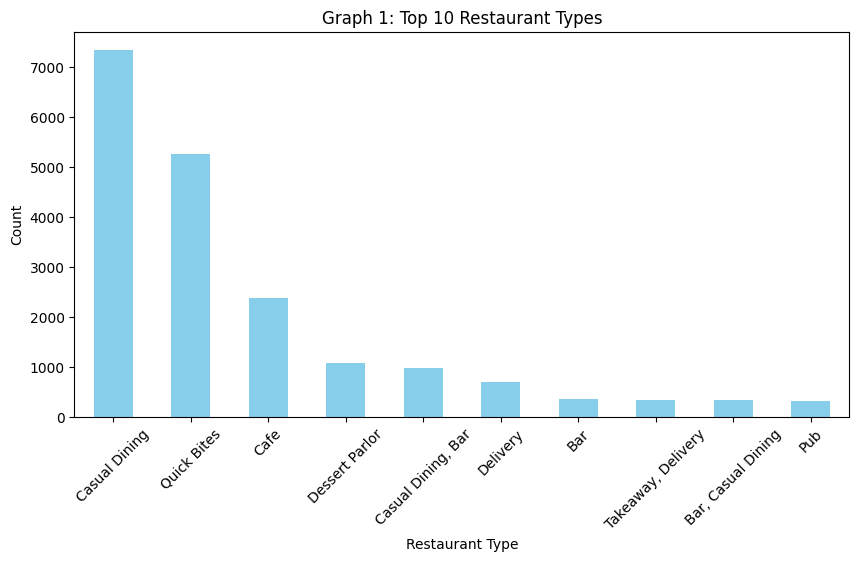

In [10]:
#Most common restaurant types
plt.figure(figsize=(10,5))
df['rest_type'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Graph 1: Top 10 Restaurant Types")
plt.xlabel("Restaurant Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

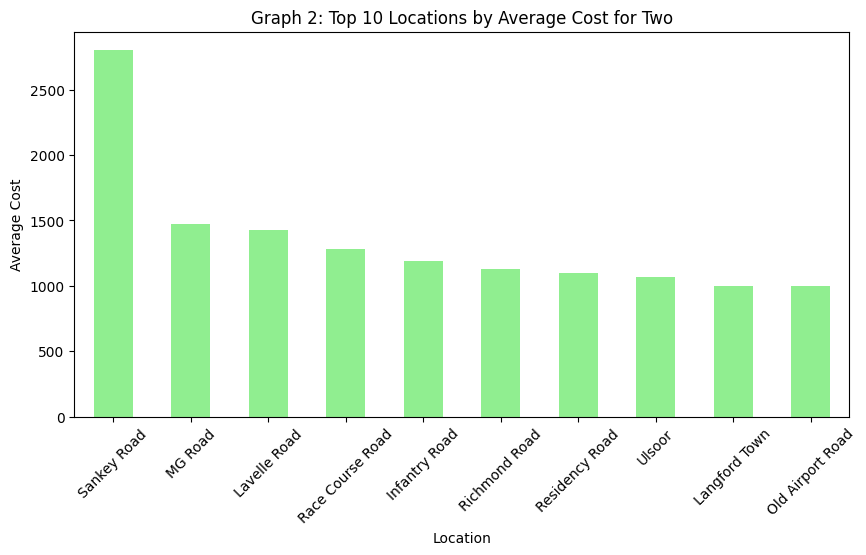

In [11]:
# Average cost for two people (top locations)
plt.figure(figsize=(10,5))
df.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='lightgreen')
plt.title("Graph 2: Top 10 Locations by Average Cost for Two")
plt.xlabel("Location")
plt.ylabel("Average Cost")
plt.xticks(rotation=45)
plt.show()

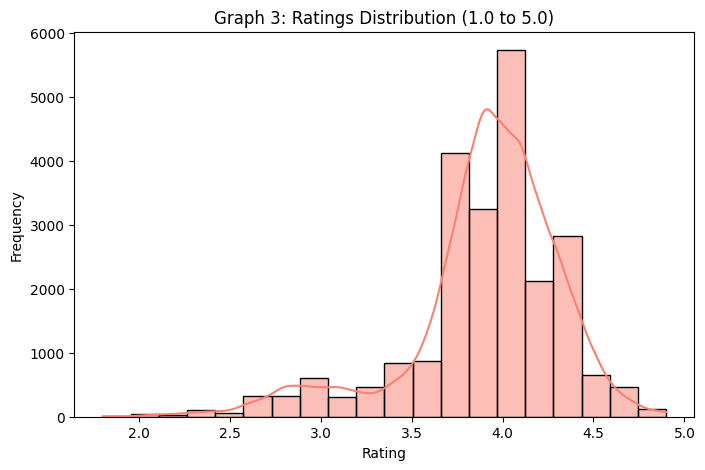

In [12]:
#  Ratings distribution
plt.figure(figsize=(8,5))
sns.histplot(df['rate'].dropna(), bins=20, kde=True, color='salmon')
plt.title("Graph 3: Ratings Distribution (1.0 to 5.0)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

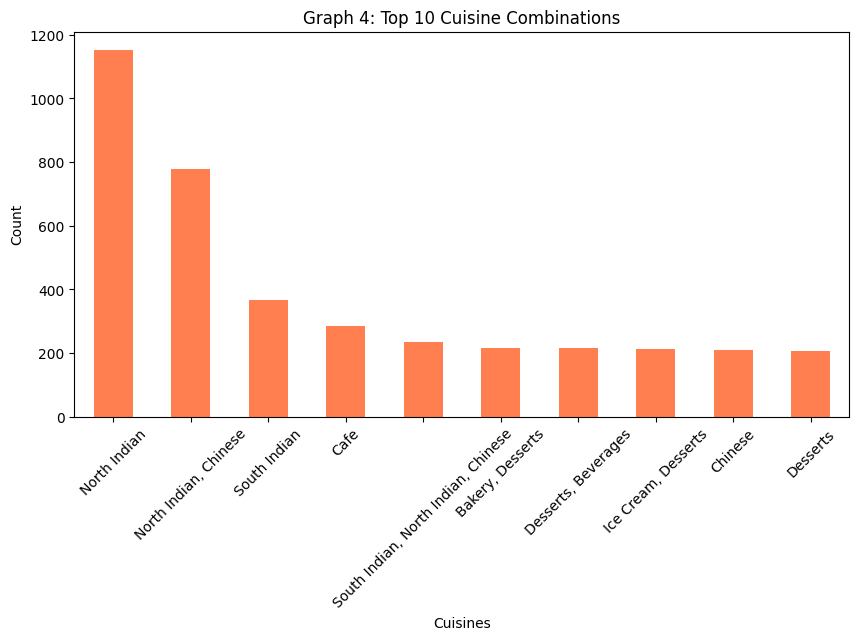

In [13]:
# Top cuisines served (as combined strings)
plt.figure(figsize=(10,5))
df['cuisines'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Graph 4: Top 10 Cuisine Combinations")
plt.xlabel("Cuisines")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

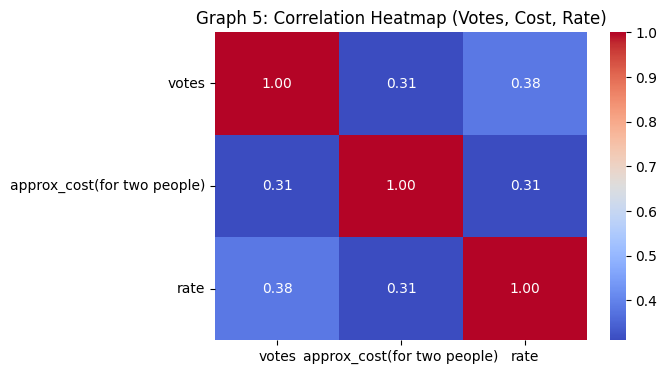

In [14]:
# Heatmap to see numeric correlations
numeric_df = df[['votes', 'approx_cost(for two people)', 'rate']].copy()
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Graph 5: Correlation Heatmap (Votes, Cost, Rate)")
plt.show()

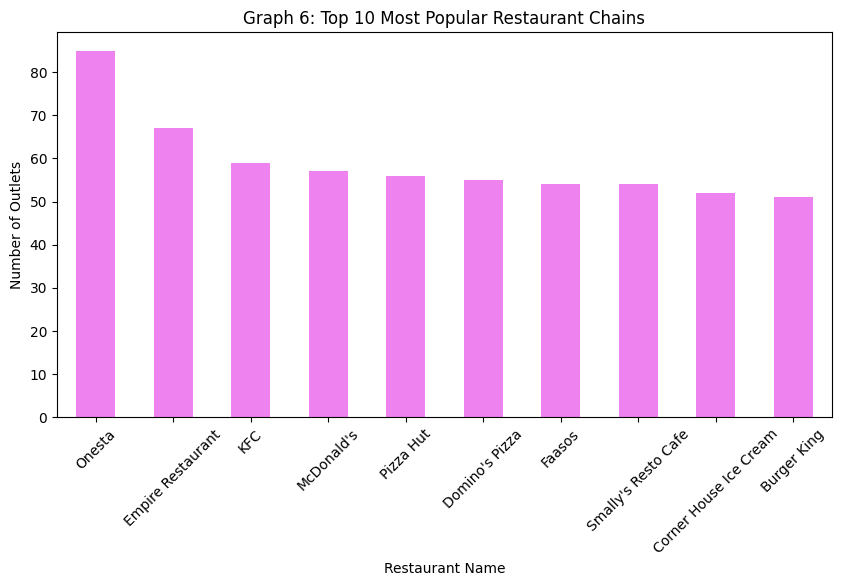

In [15]:
# Top 10 Most Popular Restaurant Chains
plt.figure(figsize=(10,5))
df['name'].value_counts().head(10).plot(kind='bar', color='violet')
plt.title("Graph 6: Top 10 Most Popular Restaurant Chains")
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Outlets")
plt.xticks(rotation=45)
plt.show()

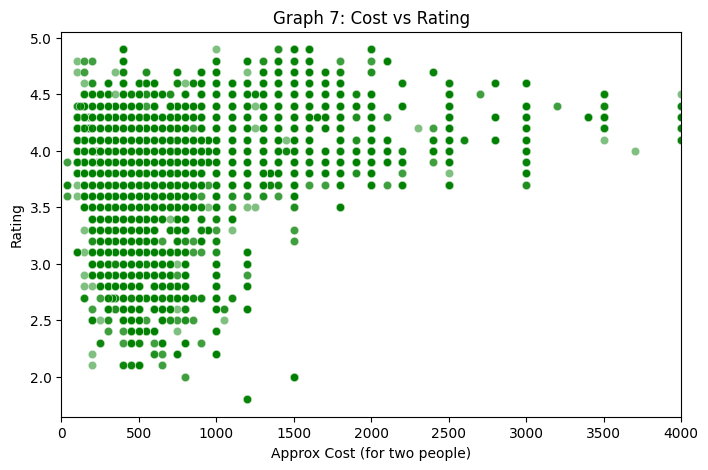

In [16]:
# Cost vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='approx_cost(for two people)', y='rate', alpha=0.5, color='green')
plt.title("Graph 7: Cost vs Rating")
plt.xlabel("Approx Cost (for two people)")
plt.ylabel("Rating")
plt.xlim(0, 4000) # Zoom in on the main cluster
plt.show()

C:\Users\devan\AppData\Local\Temp\ipykernel_25688\90460600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='book_table', y='rate', data=df, palette='Set2')


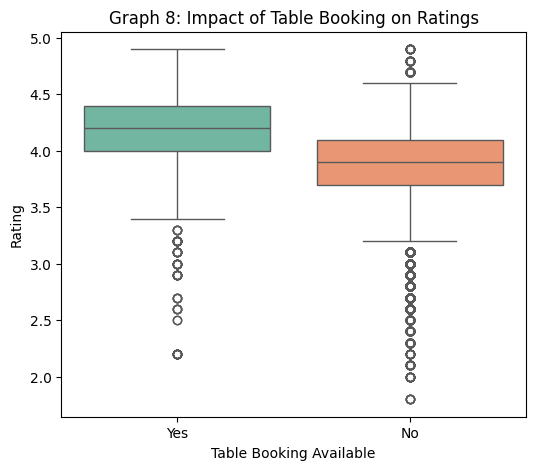

In [17]:
# Impact of Table Booking on Ratings
plt.figure(figsize=(6,5))
sns.boxplot(x='book_table', y='rate', data=df, palette='Set2')
plt.title("Graph 8: Impact of Table Booking on Ratings")
plt.xlabel("Table Booking Available")
plt.ylabel("Rating")
plt.show()

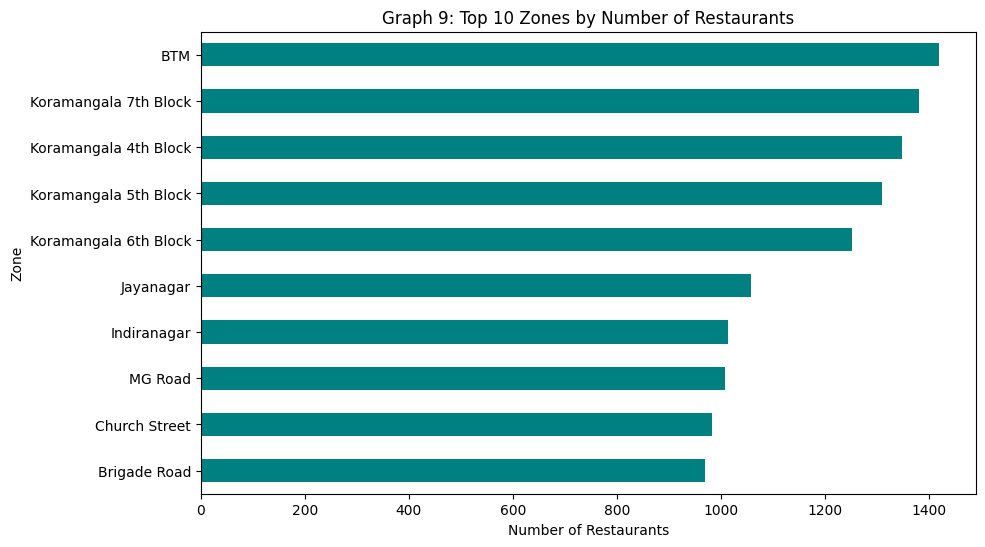

In [18]:
#  Restaurant Counts by Zone (listed_in(city))
plt.figure(figsize=(10,6))
df['listed_in(city)'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title("Graph 9: Top 10 Zones by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Zone")
plt.gca().invert_yaxis() # Show the top item at the top
plt.show()

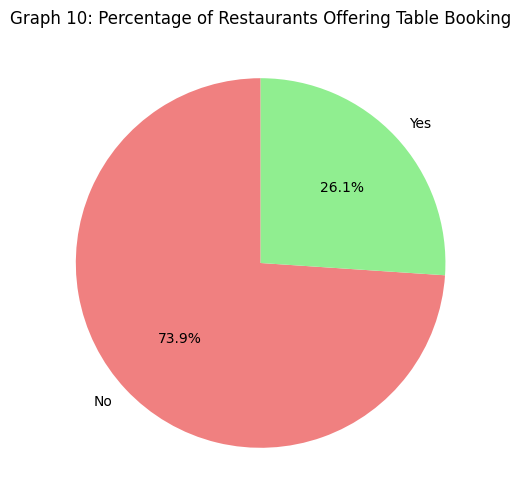

In [19]:
# Table Booking Availability
plt.figure(figsize=(6,6))
df['book_table'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'],
                                    startangle=90, labels=['No', 'Yes'])
plt.title("Graph 10: Percentage of Restaurants Offering Table Booking")
plt.ylabel("") # Hide the y-label
plt.show()

C:\Users\devan\AppData\Local\Temp\ipykernel_25688\593217264.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_types, x='rate', y='rest_type', palette='Set3')


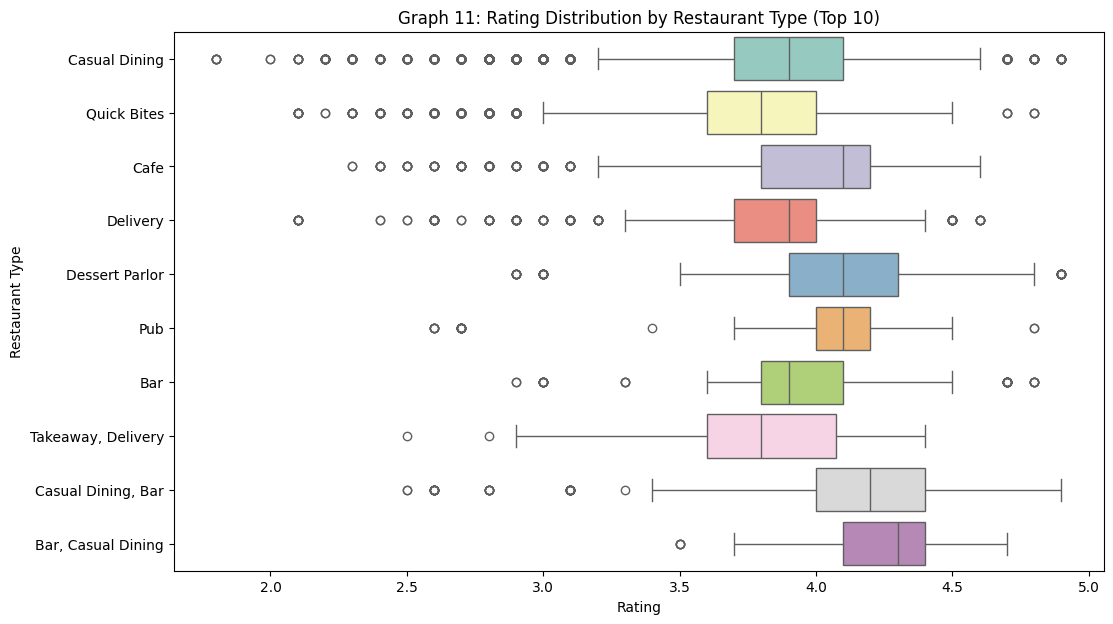

In [20]:
#  Restaurant Type vs. Rating (Top 10 Types)
# Get top 10 most common restaurant types
top_rest_types = df['rest_type'].value_counts().head(10).index
df_top_types = df[df['rest_type'].isin(top_rest_types)]

plt.figure(figsize=(12,7))
sns.boxplot(data=df_top_types, x='rate', y='rest_type', palette='Set3')
plt.title("Graph 11: Rating Distribution by Restaurant Type (Top 10)")
plt.xlabel("Rating")
plt.ylabel("Restaurant Type")
plt.show()

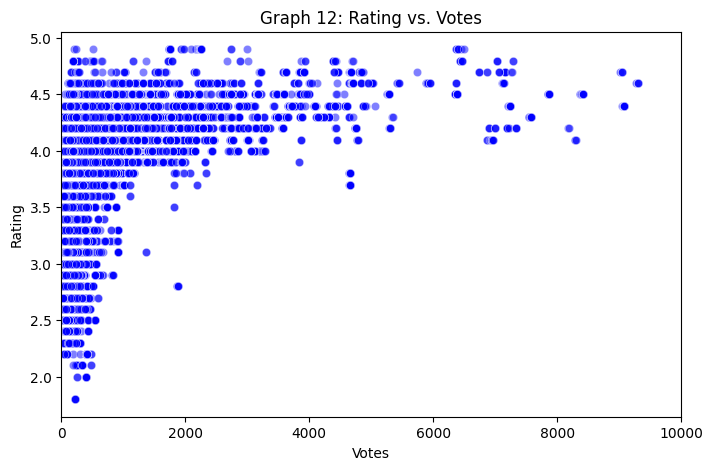

In [21]:
# Rating vs. Votes
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='votes', y='rate', alpha=0.5, color='blue')
plt.title("Graph 12: Rating vs. Votes")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.xlim(0, 10000) # Limit x-axis to see the dense area
plt.show()


C:\Users\devan\AppData\Local\Temp\ipykernel_25688\3385962952.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cuisines, x='count', y='item', palette='coolwarm')


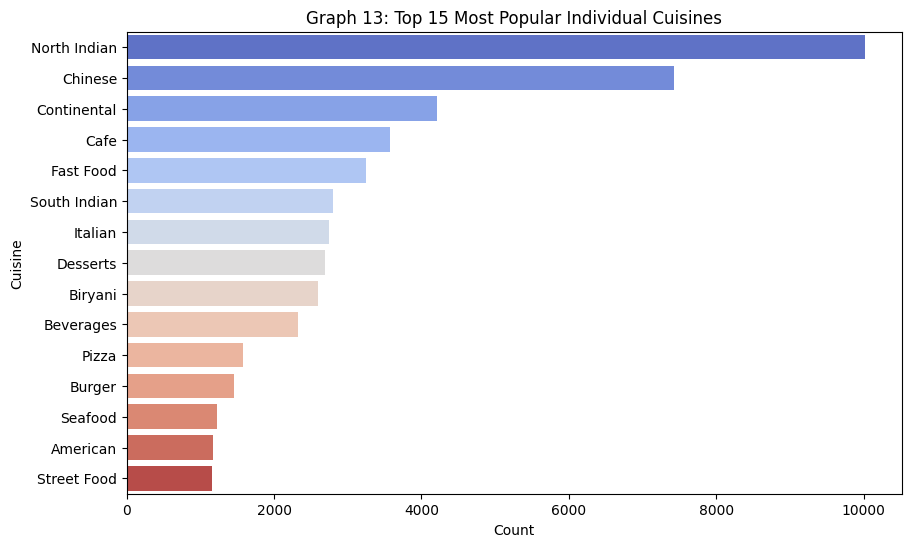

In [22]:
#  Top 15 Individual Cuisines (Split)
top_cuisines = get_top_items(df['cuisines'], n=15)
plt.figure(figsize=(10,6))
sns.barplot(data=top_cuisines, x='count', y='item', palette='coolwarm')
plt.title("Graph 13: Top 15 Most Popular Individual Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

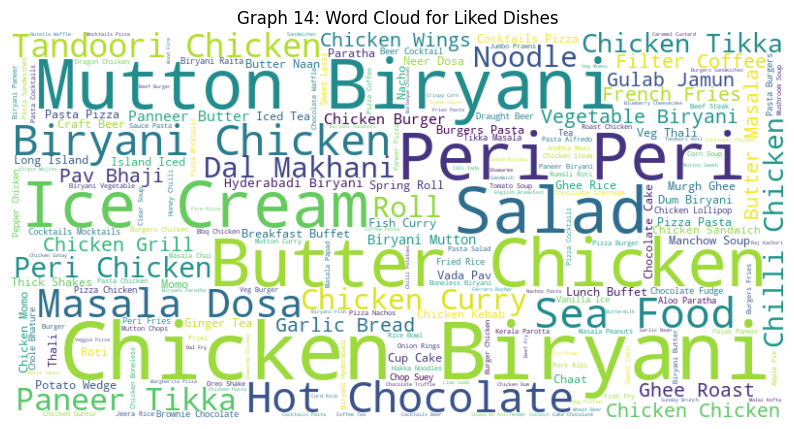

In [23]:
# Word Cloud of Liked Dishes
dish_corpus = get_text_corpus(df['dish_liked'])
if dish_corpus.strip(): # Check if corpus is not empty
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(dish_corpus)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') # Hide axes
    plt.title("Graph 14: Word Cloud for Liked Dishes")
    plt.show()
else:
    print("Skipping 'Liked Dishes' Word Cloud as no data was found.")

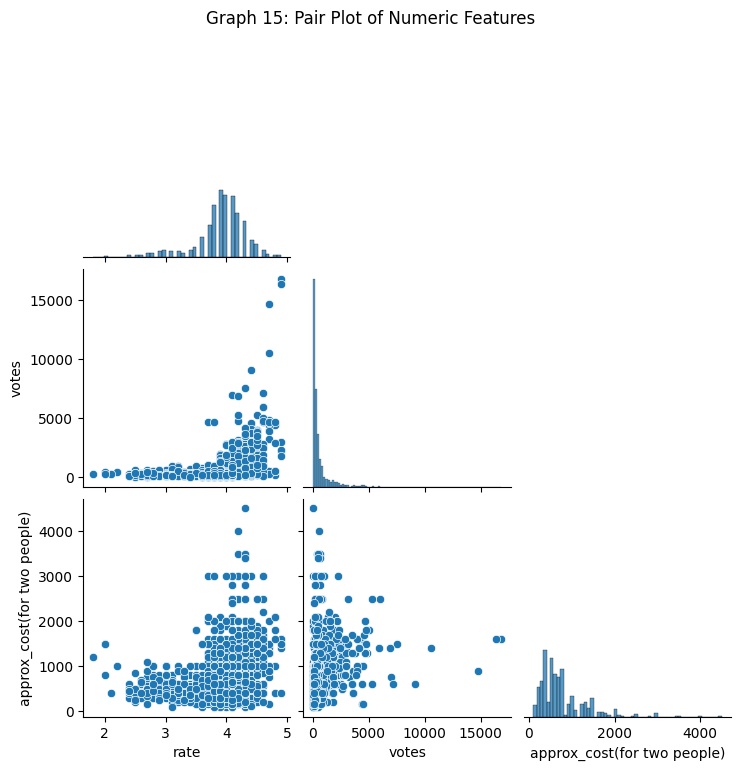


--- All 15 plots generated! ---


In [24]:
# Pair Plot of Numeric Features
# Using a sample to speed it up
df_sample = df.sample(n=min(2000, len(df)), random_state=1) 
sns.pairplot(df_sample[['rate', 'votes', 'approx_cost(for two people)']].dropna(), corner=True)
plt.suptitle("Graph 15: Pair Plot of Numeric Features", y=1.02)
plt.show()

print("\n--- All 15 plots generated! ---")